In [14]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"C:\Users\Gouse MG\Desktop\Machine Learning\PatientList.csv")
df.head(10)

,OPI_BIN,Total_Patients,Nos_PT_Called,Nos_PT_Texted,Nos_PT_Emailed,Nos_PT_Anymedia
0,High_OPI,94,12,2,2,13
1,Medium_OPI,103,5,0,3,6
2,Low_OPI,271,14,2,1,16
3,NO_OPI,884,62,10,12,71


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   OPI_BIN          4 non-null      object
 1   Total_Patients   4 non-null      int64 
 2   Nos_PT_Called    4 non-null      int64 
 3   Nos_PT_Texted    4 non-null      int64 
 4   Nos_PT_Emailed   4 non-null      int64 
 5   Nos_PT_Anymedia  4 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 320.0+ bytes


<AxesSubplot:xlabel='OPI_BIN'>

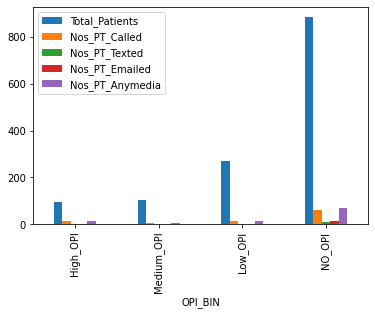

In [3]:
df.plot.bar('OPI_BIN')

In [6]:
df

,OPI_BIN,Total_Patients,Nos_PT_Called,Nos_PT_Texted,Nos_PT_Emailed,Nos_PT_Anymedia
0,High_OPI,94,12,2,2,13
1,Medium_OPI,103,5,0,3,6
2,Low_OPI,271,14,2,1,16
3,NO_OPI,884,62,10,12,71


In [38]:
df = df.set_index('OPI_BIN')
result_pct = df.div(df.sum(axis=1), axis=0)

print(result_pct.reset_index())

      OPI_BIN  Total_Patients  Nos_PT_Called  Nos_PT_Texted  Nos_PT_Emailed  \
0    High_OPI        0.764228       0.097561       0.016260        0.016260   
1  Medium_OPI        0.880342       0.042735       0.000000        0.025641   
2     Low_OPI        0.891447       0.046053       0.006579        0.003289   
3      NO_OPI        0.850818       0.059673       0.009625        0.011550   

   Nos_PT_Anymedia  
0         0.105691  
1         0.051282  
2         0.052632  
3         0.068335  


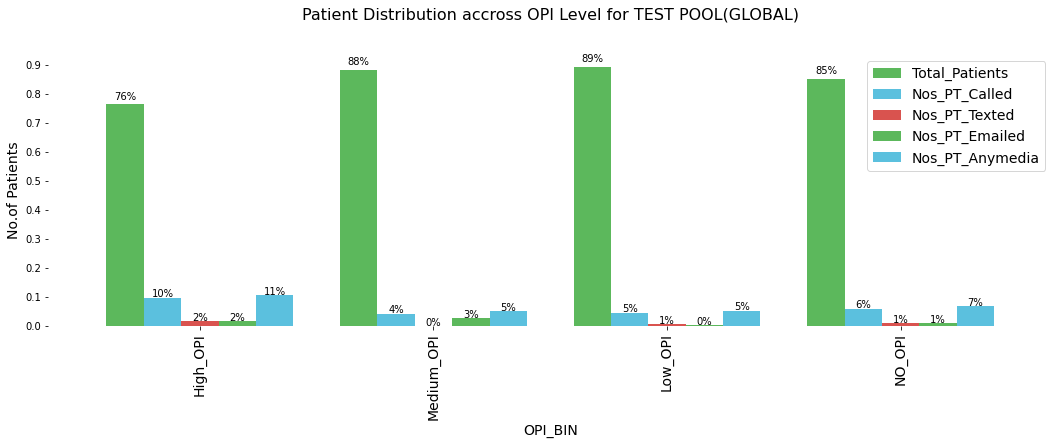

In [71]:
ax = result_pct.plot(kind='bar',figsize=(18,5),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=df.columns,fontsize= 14)
plt.title("Patient Distribution accross OPI Level for TEST POOL(GLOBAL)",fontsize= 16,loc='center',pad=35)
plt.xlabel("OPI_BIN",fontsize=14,loc='center')
plt.ylabel("No.of Patients",fontsize=14,loc='center')
plt.locator_params(axis="y", nbins=10)

plt.xticks(fontsize=14)


for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks()

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')